In [1]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
import string
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize



# read the training txt    
short_pos = open ("C:\software\WinPython-64bit-3.6.2.0Qt5\\notebooks\capstone\shortmoviereview\positive.txt").read()
short_neg = open ("C:\software\WinPython-64bit-3.6.2.0Qt5\\notebooks\capstone\shortmoviereview\\negative.txt").read()

#split into paragraph and append a tag
documents_pos = []
documents_neg = []

for r in short_pos.split('\n'):
    documents_pos.append((r,"pos"))
    
for r in short_neg.split('\n'):
    documents_neg.append((r,"neg"))
    
documents = documents_pos + documents_neg
print("has ",len(documents_pos)," postive movies reviews")
print("has ",len(documents_neg)," negative movies reviews")
print("all documents is ",len(documents))    
# word tokenize and lowercase every word
all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())
    
for w in short_neg_words:
    all_words.append(w.lower())

#remove the stop words and punctuation.
stop_words = set(stopwords.words('english'))

filtered_words = [w for w in all_words if not w in stop_words and w not in string.punctuation]

#find the most frequent word from 1st to 5000th
all_words = nltk.FreqDist(filtered_words)
print(all_words.most_common(15))

word_features = list(all_words.keys())[:5000]

#save word_features
save_word_features = open("pickled_algos/word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

has  5332  postive movies reviews
has  5332  negative movies reviews
all documents is  10664
[("'s", 3537), ('film', 1589), ('movie', 1336), ("n't", 940), ('one', 739), ('like', 720), ('--', 670), ('``', 655), ('story', 493), ('much', 386), ('even', 382), ('good', 377), ('comedy', 356), ('time', 341), ('characters', 330)]


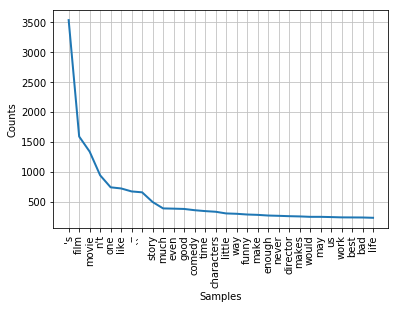

In [2]:
all_words.plot(30)

In [3]:
#这里补上文本的长度
# inspecting the dataset a little more for sentence length
def find_length(text):
    token=word_tokenize(text)
    leng=len(token)
    return leng
        
sentence_lengths = [find_length(rev) for (rev, category) in documents]
print(max(sentence_lengths))


62


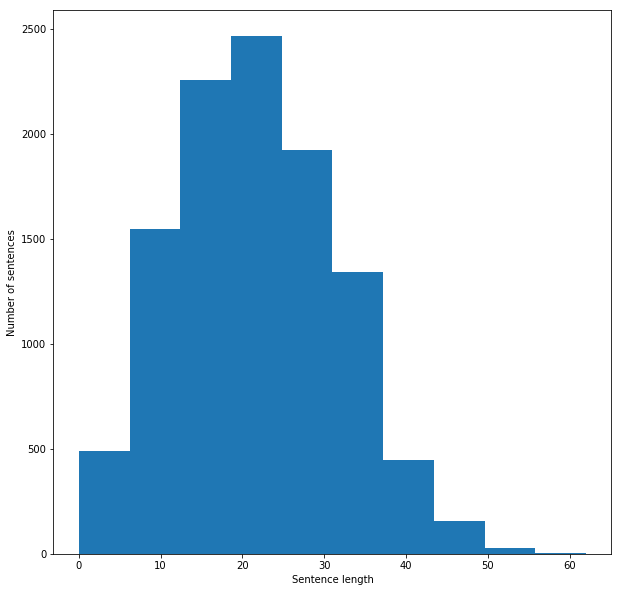

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

## Data Processing
### Converting words to Features with NLTK

In [5]:
# turn every setence into features(every word word_feature tag true or flase according to word_feature in this sentence)
word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

featuresets = [(find_features(parag),category) for (parag, category) in documents]

#get training_set and testing_set
random.shuffle(featuresets)

In [6]:
#get training_set and testing_set
random.shuffle(featuresets)

training_set = featuresets[:10000]
testing_set = featuresets[10000:]

## Implementation

In [7]:
#apply naiveBayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
#list the word from feature that can most valuable to reflect its catergory
classifier.show_most_informative_features(15)

Original Naive Bayes Algo accuracy percent: 71.23493975903614
Most Informative Features
              engrossing = True              pos : neg    =     19.6 : 1.0
                  stupid = True              neg : pos    =     18.4 : 1.0
               inventive = True              pos : neg    =     14.9 : 1.0
              refreshing = True              pos : neg    =     12.9 : 1.0
                    warm = True              pos : neg    =     12.5 : 1.0
               wonderful = True              pos : neg    =     12.5 : 1.0
                  unique = True              pos : neg    =     12.3 : 1.0
                 culture = True              pos : neg    =     12.1 : 1.0
            refreshingly = True              pos : neg    =     11.6 : 1.0
             mesmerizing = True              pos : neg    =     11.0 : 1.0
               realistic = True              pos : neg    =     11.0 : 1.0
                    ages = True              pos : neg    =     11.0 : 1.0
            

In [8]:
#save classifier-naiveBayes
save_classifier = open("pickled_algos/originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [9]:
# implement other classifier and save 

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)
#save classifer-MNB
save_classifier = open("pickled_algos/MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)
#save classifier-BernoulliNB
save_classifier = open("pickled_algos/BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)
#save classifier-logisticaRegression
save_classifier = open("pickled_algos/LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)
#save classifer-SVC
save_classifier = open("pickled_algos/SVC_classifier5k.pickle","wb")
pickle.dump(SVC_classifier, save_classifier)
save_classifier.close()

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)
#save classifier linearSVC
save_classifier = open("pickled_algos/LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()


NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)
#save classifier linearSVC
save_classifier = open("pickled_algos/NuSVC_classifier5K.pickle","wb")
pickle.dump(NuSVC_classifier, save_classifier)
save_classifier.close() 

MNB_classifier accuracy percent: 71.6867469879518
BernoulliNB_classifier accuracy percent: 70.78313253012048
LogisticRegression_classifier accuracy percent: 70.18072289156626
SVC_classifier accuracy percent: 48.3433734939759
LinearSVC_classifier accuracy percent: 68.52409638554217
NuSVC_classifier accuracy percent: 69.12650602409639


## Refinement

In [12]:
## adaboost
#vote the classsifiers
# vote system that choose the best result and get the confidence of this result.

from nltk.classify.api import ClassifierI
from statistics import mode
 
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    
voted_classifier = VoteClassifier(classifier,
                                  NuSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", nltk.classify.accuracy(voted_classifier, testing_set)*100)

voted_classifier accuracy percent: 72.28915662650603
